importar biblioteca


# K-MEANS


IMPORTAR LIBRERIAS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Carga de datos

In [4]:
datos = pd.read_csv('/content/sample_data/kmeans.csv')

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   Z       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
datos.describe(). T

,count,mean,std,min,25%,50%,75%,max
X,100.0,0.015401,0.001792,0.005063,0.014823,0.015311,0.015799,0.025315
Y,100.0,0.000122,0.005090,-0.032025,-0.000061,0.000427,0.000671,0.033154
Z,100.0,1.009540,0.004017,1.001071,1.007415,1.009367,1.011319,1.032547


Aca hacemos un grafico de mapa de calor, para ver la correlacion entre las variables numericas.

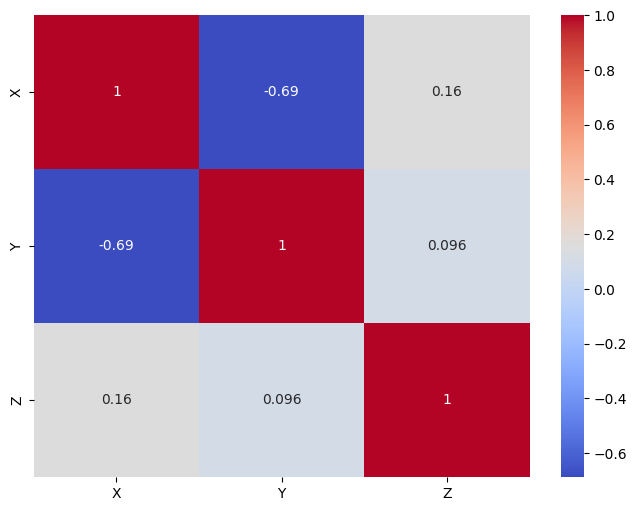

In [8]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm')
plt.show()

No utilizo pca porque no tiene correlacion ni tanta dimensionalidad para hacerlo.


Aca escalamos los datos

In [10]:
# Aca estadarizamos los datos_var_num
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
datos_ss = ss.fit_transform(datos)

In [11]:
datos_ss = pd.DataFrame(datos_ss, columns=datos.columns)  #Transformamos datos_ss en dataframe pandas

In [12]:
# Aca importamos las librerias de los modelos que vamos a usar
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


K-means SIN PCA

Hago los graficos de codo y coeficiente de silueta para evaluar la cantidad mas adecuada de clusters

In [13]:
sumaDeCuadrados = []
coef_silueta = []
K = range(2,18) # se va a iterar con k desde 2 hasta 18
for i in K:
    km = KMeans(n_clusters = i)
    t = km.fit_predict(datos_ss)
    sumaDeCuadrados.append(km.inertia_)
    coef_silueta.append(silhouette_score(datos_ss, t))

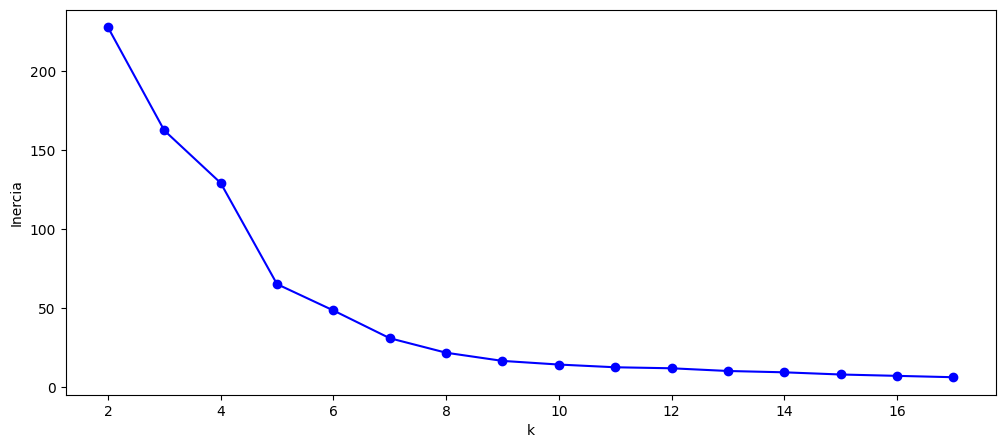

In [14]:
# Grafico de codo
fig = plt.figure(figsize=(12,5))
plt.plot(K, sumaDeCuadrados, 'bo-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.show()

EL CODO ES K=3

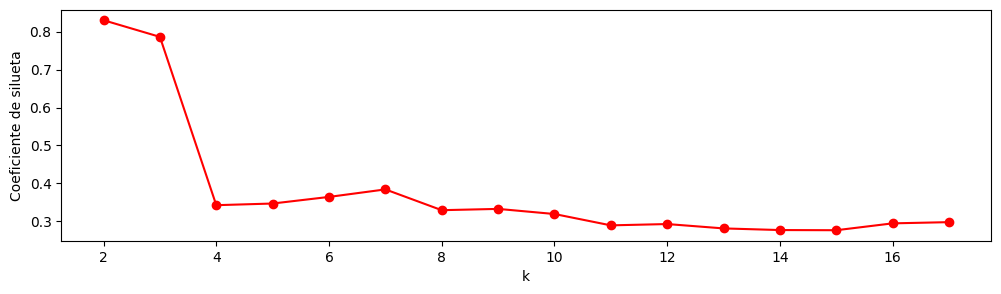

In [15]:
fig = plt.figure(figsize=(12,3))
plt.plot(K, coef_silueta, 'ro-')
plt.xlabel('k')
plt.ylabel('Coeficiente de silueta')
plt.show()

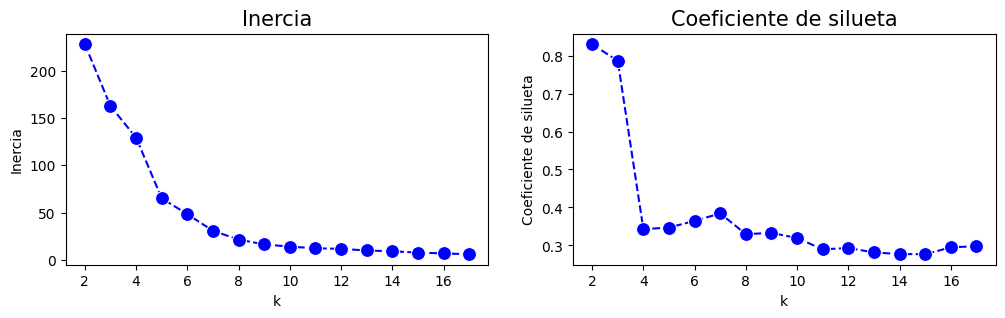

In [16]:
# OTRA FORMA DE HACER LOS GRAFICOS.
info2 = [
    (sumaDeCuadrados, 'Inercia'),
    (coef_silueta, 'Coeficiente de silueta')
]

fig, axes = plt.subplots(1, 2, figsize=(12,3))

for i, (values, title) in enumerate(info2):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    axes[i].set_xlabel('k')
    axes[i].set_ylabel('Inercia' if i == 0 else 'Coeficiente de silueta')
    axes[i].set_title(title, size=15)

In [25]:
km = KMeans(n_clusters=3)
ykm_datos = km.fit_predict(datos[['X', 'Y', 'Z']])  # Ajustar el modelo a las columnas relevantes de 'datos'
print(silhouette_score(datos[['X', 'Y', 'Z']], ykm_datos))  #0.33464321090944776
print(silhouette_score(datos[['X', 'Y', 'Z']], ykm_datos))
datos['k_means'] = ykm_datos  # Asignar la columna con la misma longitud que 'datos'

0.33464321090944776
0.33464321090944776
